In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

In [21]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    train_size:X 中用来作样本的比例，如果是0.1，则0.1*X用来作全部样本（包括训练集和测试集）
    cv：用于交叉验证的参数，cv=5代表把X随机分为5份，其中四个作为训练集，一个作为测试集
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [22]:
digits = load_digits()

In [23]:
X, y = digits.data,digits.target

In [24]:
X.shape

(1797, 64)

In [25]:
X[:2,:]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.]])

In [26]:
y.shape

(1797,)

In [27]:
# cv = ShuffleSplit(n_splits=100,test_size=0.5,random_state=0)

In [28]:
from sklearn.linear_model import LogisticRegression
estimator_lr = LogisticRegression()

[ 149  485  821 1157 1493]
[[1.         0.99328859 0.99328859 0.99328859 0.99328859 0.99328859]
 [1.         0.99793814 0.99793814 0.99793814 0.99793814 0.99793814]
 [1.         0.99878197 0.99878197 0.99878197 0.99878197 0.99878197]
 [1.         0.9991357  0.9991357  0.9991357  0.9991357  0.9991357 ]
 [0.99933021 0.99866042 0.99866042 0.99866042 0.99866042 0.99933021]]
[[0.89144737 0.75827815 0.74       0.82885906 0.87878788 0.82094595]
 [0.90131579 0.92715232 0.94666667 0.96308725 0.96969697 0.92567568]
 [0.94078947 0.97682119 0.96666667 0.97651007 0.97643098 0.93581081]
 [0.95723684 0.97350993 0.97333333 0.97651007 0.98316498 0.93918919]
 [0.97039474 0.97682119 0.98333333 0.98993289 0.996633   0.9527027 ]]


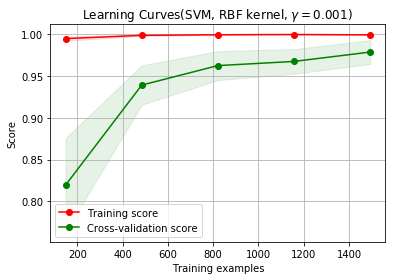

In [30]:
estimator = SVC(gamma=0.001)
title = "Learning Curves(SVM, RBF kernel, $\gamma=0.001$)"
plot_learning_curve(estimator,title=title,X=X,y=y,cv=6,n_jobs=-1)
plt.show()